<a href="https://colab.research.google.com/github/ShreeniwasJagdale/Automatic-recognition-of-industrial-tools-using-artificialintelligence-approach/blob/master/Tools_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# importing libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import cv2
import glob
import os
import tensorflow as tf

In [0]:
path = '/content/abstract-colorful-wave-transparent-stylish_1055-7049.jpg'
im = Image.open(path)
imResize = im.resize((100,100), Image.ANTIALIAS)
imResize.save(' resized.jpg', 'JPEG', quality=90)

In [0]:
img1 = mpimg.imread('/content/abstract-colorful-wave-transparent-stylish_1055-7049.jpg')
plt.imshow(img1)
print(img1.shape)

img = mpimg.imread('/content/ resized.jpg')
print(img.shape)

In [0]:
plt.imshow(img)

In [0]:
im = cv2.imread(path)
im_resized = cv2.resize(im, (100, 100), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
inputFolder = '/content/drive/My Drive/Dataset PNG/Screw driver'
os.mkdir('ScrewDriver_Resized')
i = 0

total_files = len(os.listdir(inputFolder))

for img in glob.glob(inputFolder + '/*.jpeg'):
  image = cv2.imread(img)
  imResized = cv2.resize(image,(200,200),interpolation=cv2.INTER_LINEAR)
  cv2.imwrite('ScrewDriver_Resized/screw_driver.%i.jpg'%i,imResized)
  #plt.figure()
  #plt.imshow(cv2.cvtColor(imResized, cv2.COLOR_BGR2RGB))
  i +=1
  print(str(i)+'/'+str(total_files)+' completed')
  cv2.waitKey(30)

cv2.destroyAllWindows()


In [0]:
# Folder Download

!zip -r /content/H.zip /content/Hammer_Resized
!zip -r /content/SD.zip /content/ScrewDriver_Resized
!zip -r /content/Sp.zip /content/Spanner_Resized

[https://towardsdatascience.com/how-to-create-your-own-image-dataset-for-deep-learning-b53f1c22c443](https://)

PART TWO

In [0]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# parameters defining
batch_size = 32
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
# path to data
# operation on data i.e. normalization
train_data = '/content/drive/My Drive/ToolsClassifier/Train_data'
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data

In [0]:
# path to data
# operation on data i.e. normalization
test_data = '/content/drive/My Drive/ToolsClassifier/Test_Data'
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data

In [0]:
# loading the data
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=test_data,
                                                           shuffle=False,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 57 images belonging to 3 classes.


In [0]:
# loading the data
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_data,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 860 images belonging to 3 classes.


In [0]:
# making batches of data
sample_training_images, _ = next(test_data_gen)

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

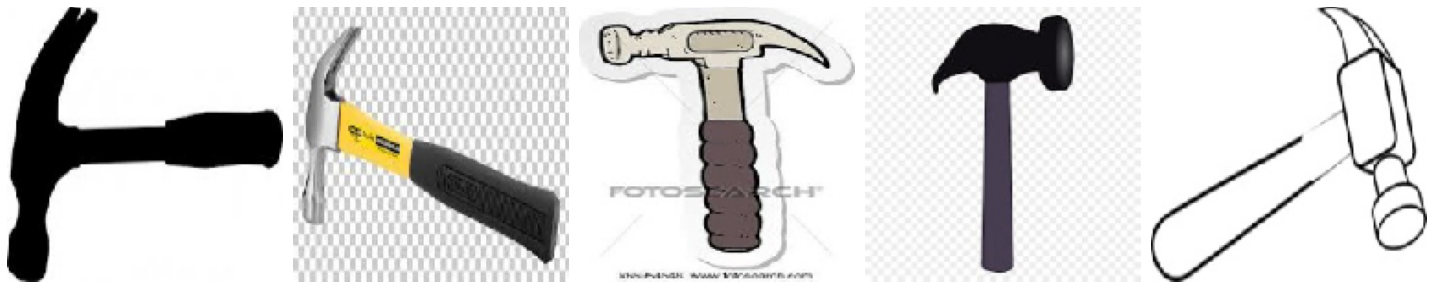

In [0]:
plotImages(sample_training_images[:5])

In [0]:
# Model building

model = tf.keras.Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256,activation='relu'),
    Dense(3,activation='softmax')
])



In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [0]:
# model parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [0]:
model.fit_generator(generator=train_data_gen,steps_per_epoch=train_data_gen.n,epochs=1,validation_data=test_data_gen,validation_steps=test_data_gen.n)

Instructions for updating:
Please use Model.fit, which supports generators.
860/860 [==============================] - 2918s 3s/step - loss: 0.1035 - accuracy: 0.9612 - val_loss: 2.8739 - val_accuracy: 0.7008


In [0]:
model.fit_generator(generator=train_data_gen,steps_per_epoch=train_data_gen.n,epochs=1,validation_data=test_data_gen,validation_steps=test_data_gen.n)

156/860 [====>.........................] - ETA: 32:17 - loss: 1.8236e-05 - accuracy: 1.0000

In [0]:
model.save_weights("/content/drive/My Drive/ToolsClassifier")

In [0]:
np.argmax(model.predict(test_data_gen),axis=1)

In [0]:
jugaad_data = '/content/drive/My Drive/ToolsClassifier/jugaad'
jugaad_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data

In [0]:
jugaad_data_gen = jugaad_image_generator.flow_from_directory(batch_size=12,
                                                           directory=jugaad_data,
                                                           shuffle=False,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

In [0]:
output = np.argmax(model.predict(jugaad_data_gen),axis=1)
if output ==1:
  print("ScrewDriver")
elif output == 0:
   print("Hammer")
else :
  print("Spanner")

ValueError: ignored

In [0]:
np.argmax(model.predict(jugaad_data_gen),axis=1)

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1])